Question: Does mental health factors have an impact on one’s interest in their work?


Null Hypothesis: Ones Mental Health state does not affect a person interest in their work. 

Alternative Hypothesis: The lower the severity of a person's Mental Health challenges positively correlates with higher work interest, and a lower Candidacy of mental health history also positively correlates with work interest.


Conclusion: Accept Null Hypothesis, reject Alternative Hypothesis 

A large volume of respondents showcased a mid range raying for a propensity to mental health issues while also being negatively impacted by mental health issues and the volume of people's interest in work was evenly spread across the low/mid and high impact ratings.

In [590]:

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import tabulate
import mpl_toolkits
from matplotlib.markers import MarkerStyle
import matplotlib.patches as patches

In [591]:
# Read csv file into dataframe from df_factors the data source inclusive of new features. 
# Verify new features for MH Severity and Candidacy are present and are loading data
df_main = pd.read_csv("df_factors.csv")
df_main.head()


,gender,country,occupation,self_employed,family_history,treatment,days_indoors,growing_stress,changes_habits,mental_health_history,mood_swings,coping_struggles,work_interest,social_weakness,mental_health_interview,care_options,mental_health_severity,candidacy_rating
0,Female,United States,Corporate,No,1,1,1-14 days,1,-1,1,0,-1,1,1,Maybe,Yes,1,3
1,Female,United States,Corporate,No,1,1,1-14 days,1,-1,1,0,-1,1,1,No,Yes,1,3
2,Female,Poland,Corporate,No,-1,1,1-14 days,1,-1,1,0,-1,1,1,Maybe,Not sure,1,1
3,Female,Australia,Corporate,No,1,1,1-14 days,1,-1,1,0,-1,1,1,No,Not sure,1,3
4,Female,United States,Corporate,No,-1,-1,1-14 days,1,-1,1,0,-1,1,1,No,No,1,-1


In [592]:
#Verify columns integers. 
df_factors.dtypes

gender                     object
country                    object
occupation                 object
self_employed              object
family_history              int64
treatment                   int64
days_indoors               object
growing_stress              int64
changes_habits              int64
mental_health_history       int64
mood_swings                 int64
coping_struggles            int64
work_interest               int64
social_weakness             int64
mental_health_interview    object
care_options               object
mental_health_severity      int64
candidacy_rating            int64
dtype: object

In [593]:
# Load data into DataFrame
df_factors = pd.read_csv('df_factors.csv')


# Display the first few rows to confirm data loaded as expected
print(df_factors.head())

   gender        country occupation self_employed  family_history  treatment  \
0  Female  United States  Corporate            No               1          1   
1  Female  United States  Corporate            No               1          1   
2  Female         Poland  Corporate            No              -1          1   
3  Female      Australia  Corporate            No               1          1   
4  Female  United States  Corporate            No              -1         -1   

  days_indoors  growing_stress  changes_habits  mental_health_history  \
0    1-14 days               1              -1                      1   
1    1-14 days               1              -1                      1   
2    1-14 days               1              -1                      1   
3    1-14 days               1              -1                      1   
4    1-14 days               1              -1                      1   

   mood_swings  coping_struggles  work_interest  social_weakness  \
0           

In [594]:
# Load data from main CSV file with all necessary columns
df = pd.read_csv('df_factors.csv')

In [595]:
# Create a df_candidacy from 'candidacy_rating' column in df_factors (stand alone files to enable in analysis
df_candidacy = df[['candidacy_rating']].dropna().reset_index(drop=True)
df_candidacy.columns = ['CandidacyRating']

# Display the first few rows of each new DataFrame to verify data is loading 
print("Candidacy DataFrame:")
print(df_candidacy.head())

Candidacy DataFrame:
   CandidacyRating
0                3
1                3
2                1
3                3
4               -1


In [596]:
print("Columns in df_candidacy:", df_candidacy.columns)

Columns in df_candidacy: Index(['CandidacyRating'], dtype='object')


In [597]:
# Create a df_severity from 'mental_health_severity' column in df_factors to use in proceeding analysis
df_severity = df[['mental_health_severity']].dropna().reset_index(drop=True)
df_severity.columns = ['mental_health_severity']

# Display the first few rows of each new DataFrame to verify data is loading 
print("Severity DataFrame:")
print(df_severity.head())

Severity DataFrame:
   mental_health_severity
0                       1
1                       1
2                       1
3                       1
4                       1


In [598]:

# Display the first few rows of each new DataFrame to verify data is loading for both new features for question 3. This data will enable an aggretgations and binning .  
print("Candidacy DataFrame:")
print(df_candidacy.head())

print("\nSeverity DataFrame:")
print(df_severity.head())

Candidacy DataFrame:
   CandidacyRating
0                3
1                3
2                1
3                3
4               -1

Severity DataFrame:
   mental_health_severity
0                       1
1                       1
2                       1
3                       1
4                       1


#Activity result:
New Dataframe created for analysis : df_candidacy
Nee Dataframe created for analysis : df_severity.cvsv
Remove rows that have missing values & reset the row numbering to start from 0

#Verify data column names. 

In [599]:
print("Columns in df_severity:", df_severity.columns)

Columns in df_severity: Index(['mental_health_severity'], dtype='object')


In [600]:
print("Columns in df_candidacy:", df_candidacy.columns)

Columns in df_candidacy: Index(['CandidacyRating'], dtype='object')


In [601]:
# Count the number of unique values for each unuque candidacy response.
mh_candidacy_summary = df_candidacy.groupby('CandidacyRating').size()

In [602]:
# Print summary statistics for analysis
print("\nMH Candidacy Summary:")
print(mh_candidacy_summary)


MH Candidacy Summary:
CandidacyRating
-5     4179
-4    10380
-3    27240
-2    42693
-1    43802
 0    47900
 1    41243
 2    34860
 3    21302
 4     9829
 5     3734
dtype: int64


In [603]:
# Print summary statistics for analysis
print("\nMH severity Summary:")
print(mh_severity_summary)


MH severity Summary:
                      Count
MentalHealthSeverity       
-5                      236
-4                     7245
-3                    20613
-2                    36371
-1                    51333
 0                    54697
 1                    54815
 2                    37125
 3                    21557
 4                     6138
 5                      236


#Verified checked results for vaidation of counts (spot check). 
New csv created for analysis : MH Candidacy Summary: column; CandidacyRating to capture Candadicy counts per unique response
New csv created for analysis : MH Severity Summary:MentalHealthSeverityto capture MH Severity counts per unique response

In [604]:
# Load the summary CSV file(s) for Candidacy and MH Severity Rating to verify counts foot to rows in initial file 
mh_candidacy_summary = pd.read_csv('mh_candidacy_summary.csv')# Sum the counts
total_counts = mh_candidacy_summary['Count'].sum()

# Verify and display the total sum of the aggregated counts equal the total population
print(f"Total Sum of Candidacy Counts: {total_counts}")

mh_severity_summary = pd.read_csv('mh_severity_summary.csv')# Sum the counts
total_counts = mh_severity_summary['Count'].sum()

# Verify and display the total sum of the aggregated counts equal the total population
print(f"Total Sum of Severity Counts: {total_counts}")

Total Sum of Candidacy Counts: 287162
Total Sum of Severity Counts: 287162


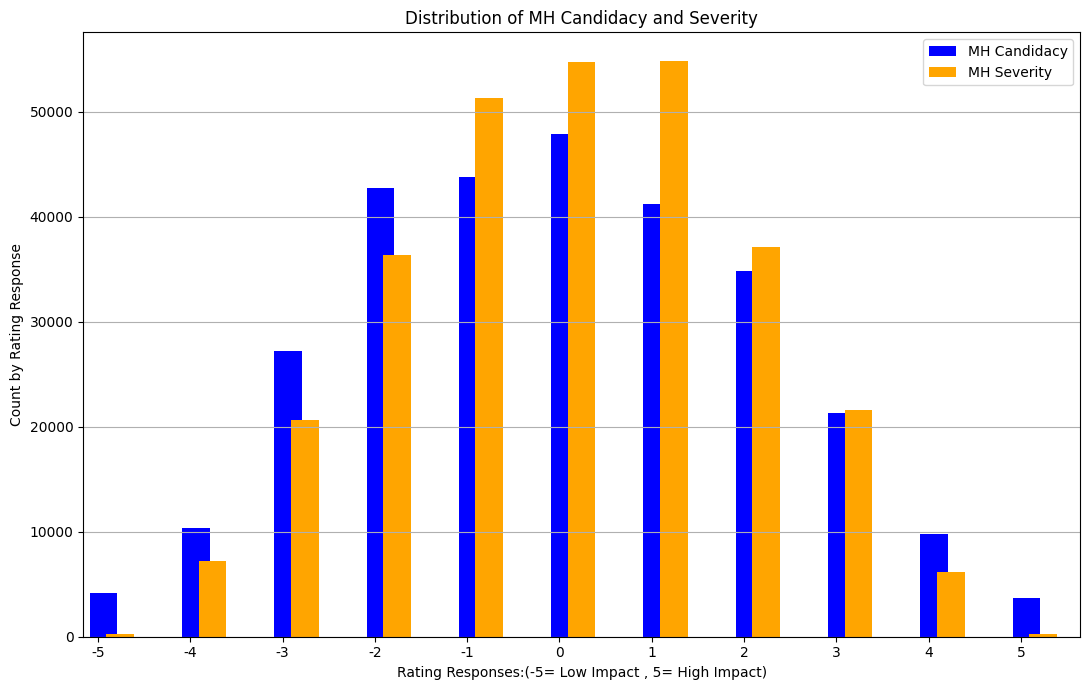

In [605]:
# Ensure the required DataFrames are defined

mh_candidacy_summary = pd.DataFrame({
    'CandidacyRating': [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5],
    'Count': [4179, 10380, 27240, 42693, 43802, 47900, 41243, 34860, 21302, 9829, 3734]
})

mh_severity_summary = pd.DataFrame({
    'MentalHealthSeverity': [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5],
    'Count': [236, 7245, 20613, 36371, 51333, 54697, 54815, 37125, 21557, 6138, 236]
})

# Set indices to clean up columns before plotting
if 'CandidacyRating' in mh_candidacy_summary.columns:
    mh_candidacy_summary.set_index('CandidacyRating', inplace=True)

if 'MentalHealthSeverity' in mh_severity_summary.columns:
    mh_severity_summary.set_index('MentalHealthSeverity', inplace=True)

# Plotting both datasets (unique responses for bothe candidacy and severity) in the same graph
plt.figure(figsize=(11, 7))

# Plot MH Candidacy
mh_candidacy_summary['Count'].plot(kind='bar', color='blue', position=0.3, width=0.3, label='MH Candidacy')

# Plot MH Severity
mh_severity_summary['Count'].plot(kind='bar', color='orange', position=-0.3, width=0.3, label='MH Severity')

# Set x-ticks to actual response values
plt.xticks(
    ticks=range(len(mh_candidacy_summary.index)),
    labels=mh_candidacy_summary.index.tolist(),
    rotation=0
)

plt.xlabel('Rating Responses:(-5= Low Impact , 5= High Impact)')
plt.ylabel('Count by Rating Response')
plt.title('Distribution of MH Candidacy and Severity')
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


#New analysis for a sanity check of key MH factors count distribution by unique responses. 

In [606]:
# Load the data from CSV into a DataFrame to count responses for key candidacy and
df = pd.read_csv('df_factors.csv')

# List of columns to analyze
columns_of_interest = [
    'family_history', 'treatment', 'growing_stress', 'changes_habits',
    'mental_health_history', 'mood_swings', 'coping_struggles',
    'work_interest', 'social_weakness'
]

# Loop through each column and calculate value counts
for col in columns_of_interest:
    counts = df[col].value_counts()
    print(f"Counts for column '{col}':\n{counts}\n")

Counts for column 'family_history':
family_history
-1    173668
 1    113494
Name: count, dtype: int64

Counts for column 'treatment':
treatment
 1    144744
-1    142418
Name: count, dtype: int64

Counts for column 'growing_stress':
growing_stress
 0    98225
 1    97854
-1    91083
Name: count, dtype: int64

Counts for column 'changes_habits':
changes_habits
 1    107579
 0     93473
-1     86110
Name: count, dtype: int64

Counts for column 'mental_health_history':
mental_health_history
-1    102179
 0     93664
 1     91319
Name: count, dtype: int64

Counts for column 'mood_swings':
mood_swings
 0    99272
-1    98062
 1    89828
Name: count, dtype: int64

Counts for column 'coping_struggles':
coping_struggles
-1    151609
 1    135553
Name: count, dtype: int64

Counts for column 'work_interest':
work_interest
 1    103964
 0     99390
-1     83808
Name: count, dtype: int64

Counts for column 'social_weakness':
social_weakness
 0    101559
-1     95627
 1     89976
Name: count, dtyp

In [607]:

# Load the data from CSV into a DataFrame to count responses for necessary columns for analysis
df = pd.read_csv('df_factors.csv')

# List of columns to analyze
columns_of_interest = [
    'family_history', 'treatment', 'growing_stress', 'changes_habits',
    'mental_health_history', 'mood_swings', 'coping_struggles',
    'work_interest', 'social_weakness'
]

# Initialize a dictionary to store results
results = {}

# Loop through each column and calculate value counts with percentages
for col in columns_of_interest:
    counts = df[col].value_counts(normalize=True) * 100  # Calculate percentages
    total_count = df[col].count()  # Total count of responses
    counts = counts.rename({-1: 'Negative', 0: 'Neutral', 1: 'Positive'})  # Rename index for clarity
    counts['Total'] = total_count  # Add total count to the counts Series
    results[col] = counts

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

# Display the results DataFrame with formatted printing
print("Counts and Percentages for Each Column:")
with pd.option_context('display.float_format', '{:.2f}%'.format):
    print(results_df)

Counts and Percentages for Each Column:
          family_history  treatment  growing_stress  changes_habits  \
Negative          60.48%     49.60%          31.72%          29.99%   
Neutral              NaN        NaN          34.21%          32.55%   
Positive          39.52%     50.40%          34.08%          37.46%   
Total         287162.00% 287162.00%      287162.00%      287162.00%   

          mental_health_history  mood_swings  coping_struggles  work_interest  \
Negative                 35.58%       34.15%            52.80%         29.18%   
Neutral                  32.62%       34.57%               NaN         34.61%   
Positive                 31.80%       31.28%            47.20%         36.20%   
Total                287162.00%   287162.00%        287162.00%     287162.00%   

          social_weakness  
Negative           33.30%  
Neutral            35.37%  
Positive           31.33%  
Total          287162.00%  


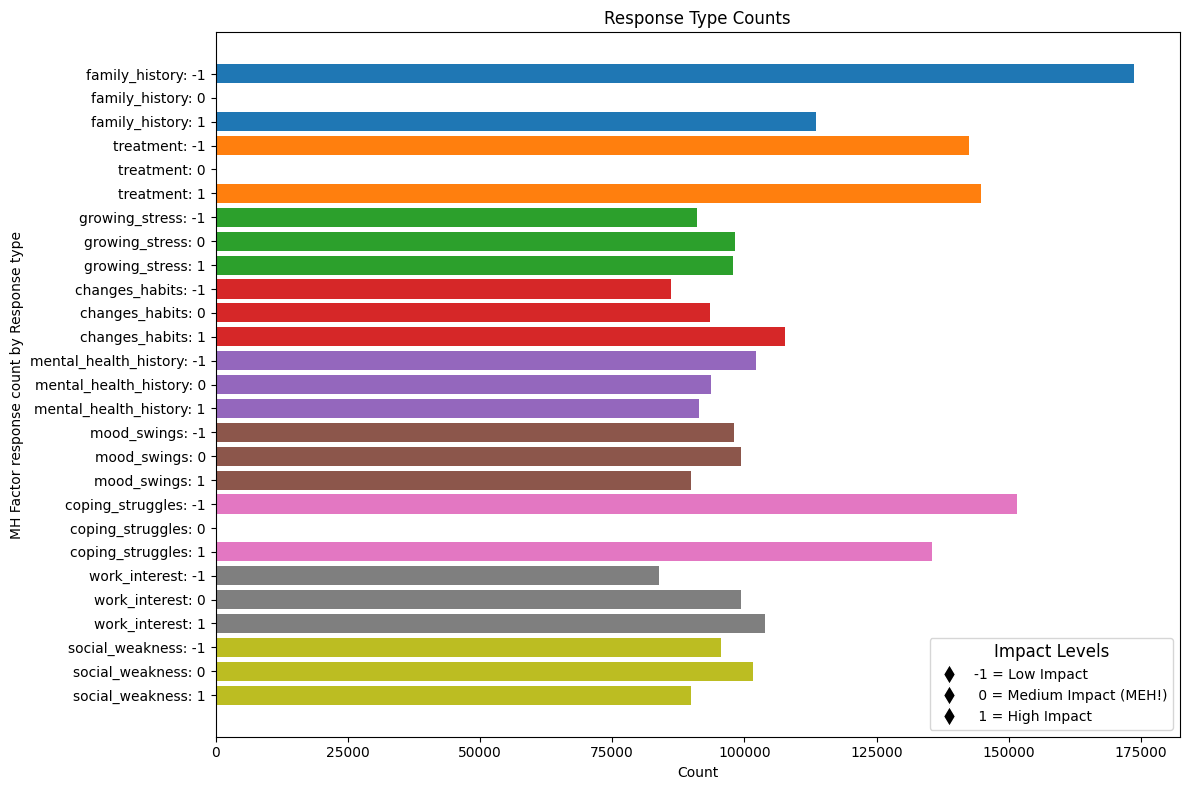

In [608]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV into a DataFrame
df = pd.read_csv('df_factors.csv')

# List of columns of MH factors to analyze relationships of each factor by response in one glance
columns_of_interest = [
    'family_history', 'treatment', 'growing_stress', 'changes_habits',
    'mental_health_history', 'mood_swings', 'coping_struggles',
    'work_interest', 'social_weakness'
]

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Initialize a dictionary to store counts for each column
counts_dict = {}

# Specify the order of responses (-1, 0, 1)
response_order = [-1, 0, 1]

# Loop through each column and calculate value counts, ensuring all response categories are included
for col in columns_of_interest:
    # Calculate value counts and reindex to include specified response_order categories
    counts = df[col].value_counts().reindex(response_order, fill_value=0)
    counts_dict[col] = counts

# Plotting each column's value counts horizontally in the same plot
for idx, (col, counts) in enumerate(counts_dict.items(), start=1):
    bars = ax.barh([f'{col}: {response}' for response in response_order], counts.values, label=col)
    
    # Add impact level text near each bar based on the rule (only for -1, 0, 1)
    for bar, count in zip(bars, counts):
        value = bar.get_width()
        response = bar.get_y()
        if response in response_order:
            if response == -1:
                impact_text = 'Low Impact'
            elif response == 0:
                impact_text = 'Medium Impact'
            elif response == 1:
                impact_text = 'High Impact'
            ax.text(value + 5, response, f'{count}', va='center', fontsize=10)  # Add count values next to bars

# Set labels and title
ax.set_xlabel('Count')
ax.set_ylabel('MH Factor response count by Response type')
ax.set_title('Response Type Counts')

# Invert y-axis to have the highest count at the top
ax.invert_yaxis()

# Custom legend for impact levels (including all response categories)
legend_elements = [
    plt.Line2D([0], [0], marker='d', color='w', markerfacecolor='k', markersize=10, label='-1 = Low Impact'),
    plt.Line2D([0], [0], marker='d', color='w', markerfacecolor='k', markersize=10, label=' 0 = Medium Impact (MEH!)'),
    plt.Line2D([0], [0], marker='d', color='w', markerfacecolor='k', markersize=10, label=' 1 = High Impact')
]
ax.legend(handles=legend_elements, loc='lower right', title='Impact Levels', title_fontsize='large')

# Show the plot
plt.tight_layout()
plt.show()




The responses from the prior results set and this sumary indicates the responses are mostly even. 
Interestingly Treatment ( have you sought MH treatment before?) and coping struggles (are you coping with struggles) are about a 50/50 split on responses. 
Unsure what the data infers from the evenly spread of data. 
Possible another vector such as gender, environment, job type or 

# Comparison of Candidacy to Work Interest results: 

In [609]:
# Count Work Interest responses by unique value. Select the 'work_interest' column from df_factors.csv
work_interest_counts = work_interest_column.value_counts().sort_index()

# Calculate percentage per unique response
total_responses = work_interest_counts.sum()
work_interest_percentage = (work_interest_counts / total_responses) * 100

# Create a DataFrame for  work interest count and percentage 
work_interest_df = pd.DataFrame({
    'Unique Value': work_interest_counts.index,
    'Count': work_interest_counts.values,
    'Percentage (%)': work_interest_percentage.values.round(2)  # Round percentage values to two decimal places
})

# Display the resulting DataFrame
print("Work Interest Responses:")
print(work_interest_df)

Work Interest Responses:
   Unique Value   Count  Percentage (%)
0            -1   83808           29.18
1             0   99390           34.61
2             1  103964           36.20


In [610]:
# Original data
candidacy_data = {
    'Unique Value': [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5],
    'Count': [4179, 10380, 27240, 42693, 43802, 47900, 412, 34860, 21302, 9829, 3734]
}

# Convert to DataFrame
df_candidacy = pd.DataFrame(candidacy_data)

# Define bins and labels
bin_edges = [-5, -1, 0, 5]
bin_labels = ['Low Impact', 'Medium Impact', 'High Impact']

# Bin the candidacy data
df_candidacy['Binned Value'] = pd.cut(df_candidacy['Unique Value'], bins=bin_edges, labels=bin_labels, right=False)

# Aggregate the counts based on bins
binned_candidacy = df_candidacy.groupby('Binned Value')['Count'].sum().reset_index()

# Display the resulting binned DataFrame
print(binned_candidacy)

    Binned Value   Count
0     Low Impact   84492
1  Medium Impact   43802
2    High Impact  114303


C:\Users\krios\AppData\Local\Temp\ipykernel_4660\3616786580.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_candidacy = df_candidacy.groupby('Binned Value')['Count'].sum().reset_index()


everything above here is good .. at this point I am trying to figure out how to relate wrk interest to candidacy 


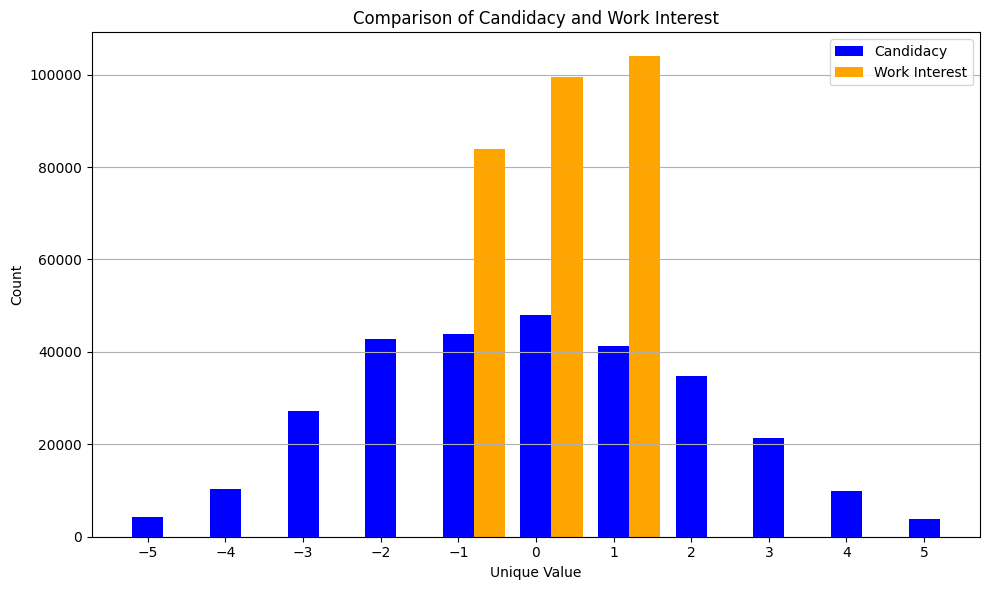

In [611]:
# Candidacy data
candidacy_data = {
    'Unique Value': [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5],
    'Count': [4179, 10380, 27240, 42693, 43802, 47900, 41243, 34860, 21302, 9829, 3734]
}

# Work Interest data
work_interest_data = {
    'Unique Value': [-1, 0, 1],
    'Count': [83808, 99390, 103964]
}

# Convert to DataFrames
df_candidacy = pd.DataFrame(candidacy_data)
df_work_interest = pd.DataFrame(work_interest_data)

# Plotting
plt.figure(figsize=(10, 6))

# Plot for Candidacy
plt.bar(df_candidacy['Unique Value'], df_candidacy['Count'], width=0.4, align='center', label='Candidacy', color='blue')

# Plot for Work Interest
plt.bar(df_work_interest['Unique Value'] + 0.4, df_work_interest['Count'], width=0.4, align='center', label='Work Interest', color='orange')

plt.xlabel('Unique Value')
plt.ylabel('Count')
plt.title('Comparison of Candidacy and Work Interest')
plt.legend()
plt.xticks(df_candidacy['Unique Value'])
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

#The above graph created to show that binning is needed to compare like grpings of answere. 

In [612]:
# Original data
candidacy_data = {
    'Unique Value': [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5],
    'Count': [4179, 10380, 27240, 42693, 43802, 47900, 41243, 34860, 21302, 9829, 3734]
}

# Convert to DataFrame
df_candidacy = pd.DataFrame(candidacy_data)

# Define bins and labels
bin_edges = [-5.1, -2.5, 1.5, 5.1]  # Updated bin edges to ensure proper grouping
bin_labels = ['Low Impact', 'Medium Impact', 'High Impact']        # Custom group labels

# Bin the candidacy data
df_candidacy['Binned Value'] = pd.cut(df_candidacy['Unique Value'], bins=bin_edges, labels=bin_labels)

# Aggregate the counts based on bins
binned_candidacy = df_candidacy.groupby('Binned Value')['Count'].sum().reset_index()

# Add Possible Bin Group to the original data for reference
df_candidacy['Possible Bin Grp'] = df_candidacy['Binned Value']

# Display the original and binned DataFrames
print("Original DataFrame with Binning:")
print(df_candidacy)

print("\nAggregated Counts per Bin Group:")
print(binned_candidacy)

Original DataFrame with Binning:
    Unique Value  Count   Binned Value Possible Bin Grp
0             -5   4179     Low Impact       Low Impact
1             -4  10380     Low Impact       Low Impact
2             -3  27240     Low Impact       Low Impact
3             -2  42693  Medium Impact    Medium Impact
4             -1  43802  Medium Impact    Medium Impact
5              0  47900  Medium Impact    Medium Impact
6              1  41243  Medium Impact    Medium Impact
7              2  34860    High Impact      High Impact
8              3  21302    High Impact      High Impact
9              4   9829    High Impact      High Impact
10             5   3734    High Impact      High Impact

Aggregated Counts per Bin Group:
    Binned Value   Count
0     Low Impact   41799
1  Medium Impact  175638
2    High Impact   69725


C:\Users\krios\AppData\Local\Temp\ipykernel_4660\3925176160.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_candidacy = df_candidacy.groupby('Binned Value')['Count'].sum().reset_index()


C:\Users\krios\AppData\Local\Temp\ipykernel_4660\1290982603.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_candidacy = df_candidacy.groupby('Binned Value')['Count'].sum().reset_index()


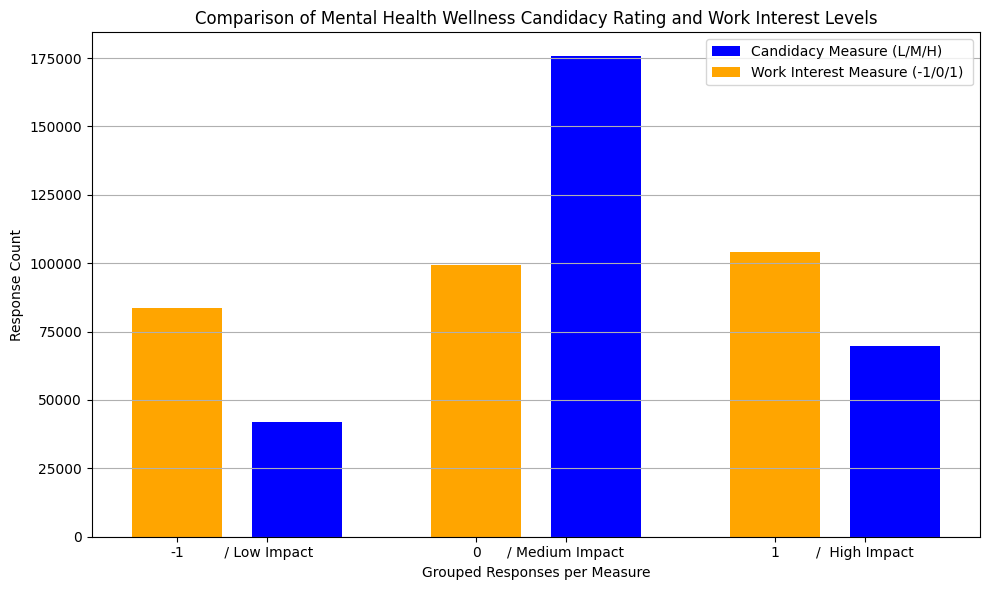

In [613]:

# Original candidacy data counts by unique response value
candidacy_data = {
    'Unique Value': [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5],
    'Count': [4179, 10380, 27240, 42693, 43802, 47900, 41243, 34860, 21302, 9829, 3734]
}

# Work Interest data
work_interest_data = {
    'Unique Value': [-1, 0, 1],
    'Count': [83808, 99390, 103964]
}

# Convert to DataFrames
df_candidacy = pd.DataFrame(candidacy_data)
df_work_interest = pd.DataFrame(work_interest_data)

# Define bins and labels
bin_edges = [-5.1, -2.5, 1.5, 5.1]  # Same bin edges as before
bin_labels = [' / Low Impact', '/ Medium Impact', '/  High Impact']

# Bin the candidacy data
df_candidacy['Binned Value'] = pd.cut(df_candidacy['Unique Value'], bins=bin_edges, labels=bin_labels)

# Aggregate the counts based on bins
binned_candidacy = df_candidacy.groupby('Binned Value')['Count'].sum().reset_index()

# Define positions for plotting
candidacy_positions = np.arange(len(bin_labels))  # Positions for binned candidacy
work_interest_positions = np.arange(-1, 2) + 0.2  # Offset positions for work interest

# Plotting
plt.figure(figsize=(10, 6))

# Plot for Binned Candidacy
plt.bar(candidacy_positions - 0.4, binned_candidacy['Count'], width=0.3, align='center', label='Candidacy Measure (L/M/H)', color='blue')

# Plot for Work Interest
plt.bar(work_interest_positions, df_work_interest['Count'], width=0.3, align='center', label='Work Interest Measure (-1/0/1) ', color='orange')

plt.xlabel('Grouped Responses per Measure')
plt.ylabel('Response Count')
plt.title('Comparison of Mental Health Wellness Candidacy Rating and Work Interest Levels')
plt.legend()

# Adjust x-ticks to match both categories
plt.xticks(
    list(candidacy_positions - 0.5) + list(work_interest_positions),
    bin_labels + df_work_interest['Unique Value'].astype(str).tolist()
)

plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [614]:
# Original Severity data counts by unique response
severity_data = {
    'Unique Value': [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5],
    'Count': [236, 7245, 20613, 36371, 51333, 54697, 54815, 33921, 21557, 6138, 236]
}
# Load mh_severity_summary.csv

# Convert to DataFrame
df_severity = pd.DataFrame(severity_data)

# Define bins and labels to show both type value types.
bin_edges = [-5.1, -2.5, 1.5, 5.1]  # Updated bin edges to ensure proper grouping
bin_labels = ['Low Impact', 'Medium Impact', 'High Impact']        # Custom group labels

# Bin the severity data
df_severity['Binned Value'] = pd.cut(df_candidacy['Unique Value'], bins=bin_edges, labels=bin_labels)

# Aggregate the counts based on bins
binned_severity = df_severity.groupby('Binned Value')['Count'].sum().reset_index()

# Add Possible Bin Group to the original data for reference
df_severity['Possible Bin Grp'] = df_severity['Binned Value']

# Display the original and binned DataFrames
print("Original DataFrame with Binning:")
print(df_severity)

print("\nAggregated Counts per Bin Group:")
print(binned_severity)

Original DataFrame with Binning:
    Unique Value  Count   Binned Value Possible Bin Grp
0             -5    236     Low Impact       Low Impact
1             -4   7245     Low Impact       Low Impact
2             -3  20613     Low Impact       Low Impact
3             -2  36371  Medium Impact    Medium Impact
4             -1  51333  Medium Impact    Medium Impact
5              0  54697  Medium Impact    Medium Impact
6              1  54815  Medium Impact    Medium Impact
7              2  33921    High Impact      High Impact
8              3  21557    High Impact      High Impact
9              4   6138    High Impact      High Impact
10             5    236    High Impact      High Impact

Aggregated Counts per Bin Group:
    Binned Value   Count
0     Low Impact   28094
1  Medium Impact  197216
2    High Impact   61852


C:\Users\krios\AppData\Local\Temp\ipykernel_4660\1668715610.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_severity = df_severity.groupby('Binned Value')['Count'].sum().reset_index()


C:\Users\krios\AppData\Local\Temp\ipykernel_4660\2707930005.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_severity = df_severity.groupby('Binned Value')['Count'].sum().reset_index()


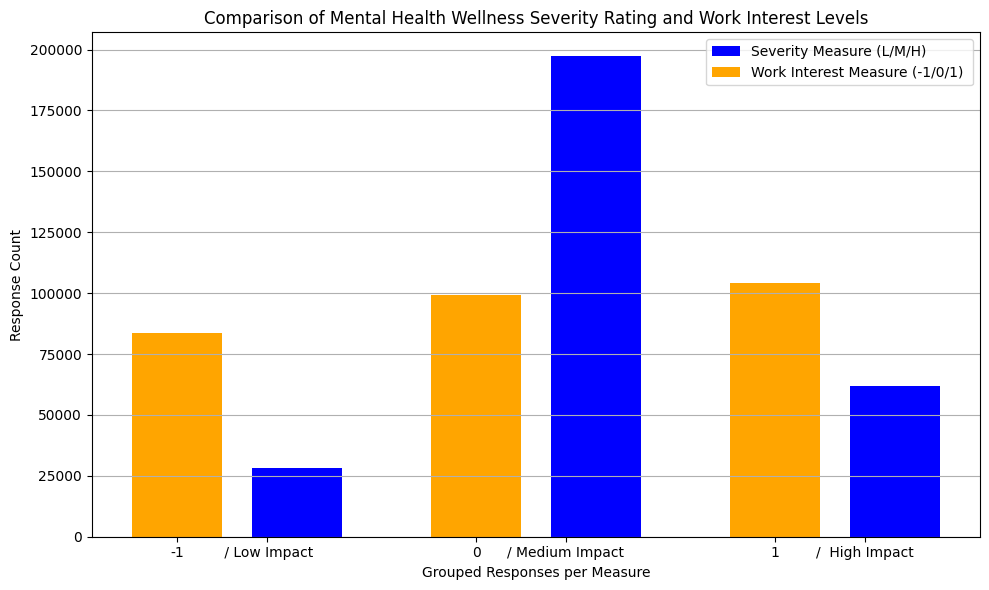

In [615]:
# Original severity data counts by unique response value
candidacy_data = {
    'Unique Value': [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5],
    'Count': [236, 7245, 20613, 36371, 51333, 54697, 54815, 33921, 21557, 6138, 236]
}

# Work Interest data
work_interest_data = {
    'Unique Value': [-1, 0, 1],
    'Count': [83808, 99390, 103964]
}

# Convert to DataFrames
df_severity = pd.DataFrame(severity_data)
df_work_interest = pd.DataFrame(work_interest_data)

# Define bins and labels
bin_edges = [-5.1, -2.5, 1.5, 5.1]  # Same bin edges as before
bin_labels = [' / Low Impact', '/ Medium Impact', '/  High Impact']

# Bin the severity data
df_severity['Binned Value'] = pd.cut(df_severity['Unique Value'], bins=bin_edges, labels=bin_labels)

# Aggregate the counts based on bins
binned_severity = df_severity.groupby('Binned Value')['Count'].sum().reset_index()

# Define positions for plotting
severity_positions = np.arange(len(bin_labels))  # Positions for binned severity
work_interest_positions = np.arange(-1, 2) + 0.2  # Offset positions for work interest

# Plotting
plt.figure(figsize=(10, 6))

# Plot for Binned Candidacy
plt.bar(severity_positions - 0.4, binned_severity['Count'], width=0.3, align='center', label='Severity Measure (L/M/H)', color='blue')

# Plot for Work Interest
plt.bar(work_interest_positions, df_work_interest['Count'], width=0.3, align='center', label='Work Interest Measure (-1/0/1) ', color='orange')

plt.xlabel('Grouped Responses per Measure')
plt.ylabel('Response Count')
plt.title('Comparison of Mental Health Wellness Severity Rating and Work Interest Levels')
plt.legend()

# Adjust x-ticks to match both categories
plt.xticks(
    list(severity_positions - 0.5) + list(work_interest_positions),
    bin_labels + df_work_interest['Unique Value'].astype(str).tolist()
)

plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [616]:
# Example DataFrame (replace with your actual data loading)
data = {
    'work_interest': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
    'candidacy_rating': [3.5, 4.2, 2.8, 3.9, 3.1, 4.5]
}

sample_df = pd.DataFrame(data)

# Group by 'work_interest' and calculate the statistical summary of 'candidacy_rating'
mean_candidacy = sample_df.groupby('work_interest')['candidacy_rating'].mean()
variance_candidacy = sample_df.groupby('work_interest')['candidacy_rating'].var()
std_deviation_candidacy = sample_df.groupby('work_interest')['candidacy_rating'].std()

# Print the mean ratings, variance, and standard deviation
print("Mean for work-interested individuals:", mean_candidacy['Yes'])
print("Mean for non-work-interested individuals:", mean_candidacy['No'])
print("Variance for work-interested individuals:", variance_candidacy['Yes'])
print("Variance for non-work-interested individuals:", variance_candidacy['No'])
print("Standard Deviation for work-interested individuals:", std_deviation_candidacy['Yes'])
print("Standard Deviation for non-work-interested individuals:", std_deviation_candidacy['No'])

Mean for work-interested individuals: 3.1333333333333333
Mean for non-work-interested individuals: 4.2
Variance for work-interested individuals: 0.12333333333333339
Variance for non-work-interested individuals: 0.09
Standard Deviation for work-interested individuals: 0.3511884584284247
Standard Deviation for non-work-interested individuals: 0.3


C:\Users\krios\AppData\Local\Temp\ipykernel_4660\3279902891.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_candidacy = df_candidacy.groupby('Binned Value')['Count'].sum().reset_index()
C:\Users\krios\AppData\Local\Temp\ipykernel_4660\3279902891.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_severity = df_severity.groupby('Binned Value')['Count'].sum().reset_index()


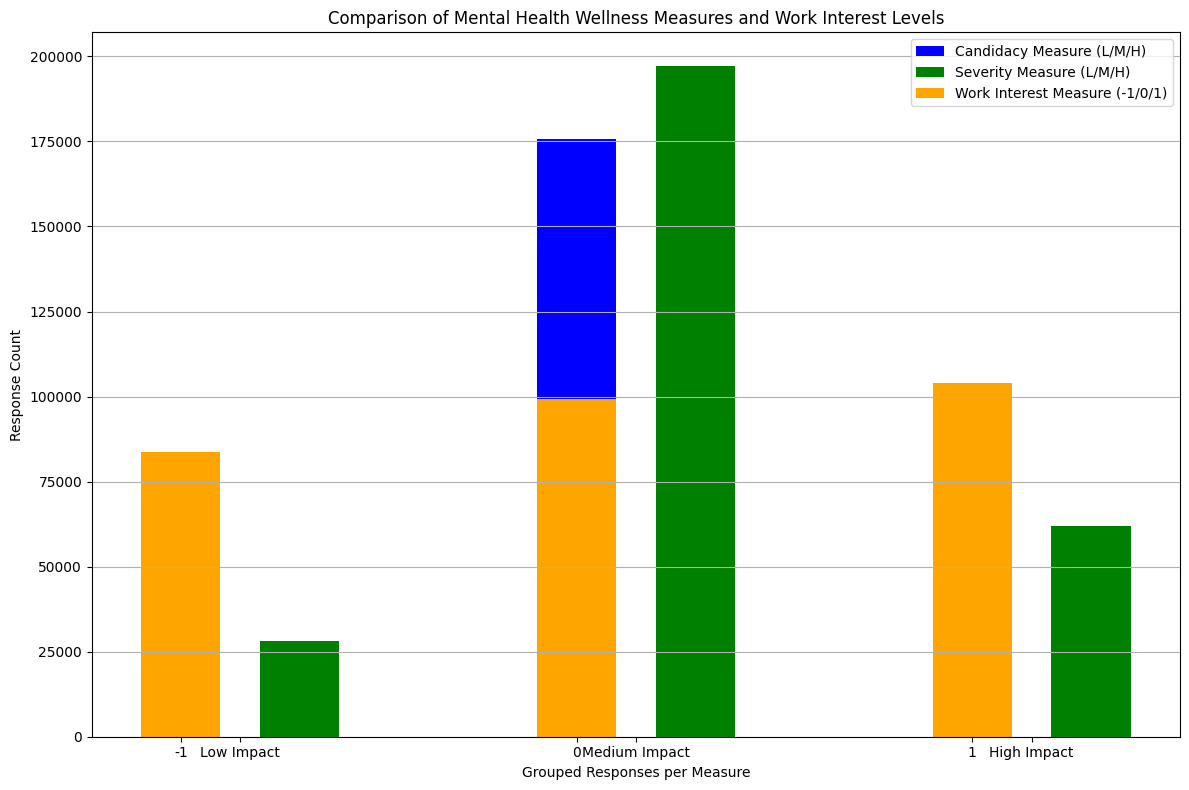

In [617]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Candidacy data counts by unique response value
candidacy_data = {
    'Unique Value': [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5],
    'Count': [4179, 10380, 27240, 42693, 43802, 47900, 41243, 34860, 21302, 9829, 3734]
}

# Severity data counts by unique response value
severity_data = {
    'Unique Value': [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5],
    'Count': [236, 7245, 20613, 36371, 51333, 54697, 54815, 33921, 21557, 6138, 236]
}

# Work Interest data
work_interest_data = {
    'Unique Value': [-1, 0, 1],
    'Count': [83808, 99390, 103964]
}

# Convert to DataFrames
df_candidacy = pd.DataFrame(candidacy_data)
df_severity = pd.DataFrame(severity_data)
df_work_interest = pd.DataFrame(work_interest_data)

# Define bins and labels
bin_edges = [-5.1, -2.5, 1.5, 5.1]
bin_labels = ['Low Impact', 'Medium Impact', 'High Impact']

# Bin the candidacy data
df_candidacy['Binned Value'] = pd.cut(df_candidacy['Unique Value'], bins=bin_edges, labels=bin_labels)
binned_candidacy = df_candidacy.groupby('Binned Value')['Count'].sum().reset_index()

# Bin the severity data
df_severity['Binned Value'] = pd.cut(df_severity['Unique Value'], bins=bin_edges, labels=bin_labels)
binned_severity = df_severity.groupby('Binned Value')['Count'].sum().reset_index()

# Define positions for plotting
positions = np.arange(len(bin_labels))
work_interest_positions = np.arange(-1, 2) + 0.2

# Plotting
plt.figure(figsize=(12, 8))

# Plot for Binned Candidacy
plt.bar(positions - 0.3, binned_candidacy['Count'], width=0.2, align='center', label='Candidacy Measure (L/M/H)', color='blue')

# Plot for Binned Severity
plt.bar(positions, binned_severity['Count'], width=0.2, align='center', label='Severity Measure (L/M/H)', color='green')

# Plot for Work Interest
plt.bar(work_interest_positions + 0.5, df_work_interest['Count'], width=0.2, align='center', label='Work Interest Measure (-1/0/1)', color='orange')

# Labels and Titles
plt.xlabel('Grouped Responses per Measure')
plt.ylabel('Response Count')
plt.title('Comparison of Mental Health Wellness Measures and Work Interest Levels')
plt.legend()

# Adjust x-ticks to match both categories
plt.xticks(
    list(positions - 0.15) + list(work_interest_positions + 0.5),
    bin_labels + df_work_interest['Unique Value'].astype(str).tolist()
)

plt.grid(True, axis='y')
plt.tight_layout()
plt.show()
